In [2]:
# for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for machine learning
from sklearn import preprocessing, model_selection


In [3]:
'''
Читаем данные из файла, и сразу смотрим заголовки столбцов (название фич) и первые 5 строк.

'''

dtf = pd.read_csv('data/penguins.csv')
dtf.head()

,Unnamed: 0,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

In [5]:
'''
Функция подготовки датасета для дальнейшего скармливания моделям
'''

def prep(df):
    '''
    заменяем категориальные данные на числовые
    нормируем данные

    :param df: входной датасет
    :return: возвращает новый датасет, полностью готовый для обучения
    '''
    df.loc[df.species == 'Adelie', 'species_ind'] = 0
    df.loc[df.species == 'Chinstrap', 'species_ind'] = 1
    df.loc[df.species == 'Gentoo', 'species_ind'] = 2
    df.loc[df.island == 'Biscoe', 'island_ind'] = 0
    df.loc[df.island == 'Dream', 'island_ind'] = 1
    df.loc[df.island == 'Torgersen', 'island_ind'] = 2

    df.loc[df.sex == 'MALE', 'sex_g'] = 0
    df.loc[df.sex == 'FEMALE', 'sex_g'] = 1

    df.drop('Unnamed: 0', axis=1, inplace=True)
    emdf = df.dropna(axis=0, how='any', inplace=False)

    # нормируем значения
    Y = 'species_ind'

    n_df = emdf
    lbs = []

    for v in dtf.columns:
        if utils_recognize_type(dtf, v) == 'cat':
            lbs.append(v)

    n_df.drop(columns = lbs, inplace=True)

    scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
    X = scaler.fit_transform(n_df)

    train_emdf_scaled = pd.DataFrame(X, columns=n_df.columns,index=n_df.index )

    return  train_emdf_scaled

In [6]:
'''
Получаем чистенький датасет
'''
scaled_dtf = prep(dtf)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
'''
смотрим, что в нем.

Все категориальные столбцы были удалены, даже те, которые превратили в числовые.
Если числовые категориальные столбцы нужны, то нужно изменить логику в функции utils_recognize_type

'''
scaled_dtf.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
4,0.167273,0.738095,0.355932,0.208333
5,0.261818,0.892857,0.305085,0.263889


In [8]:
'''
Делим на трейн и тест
'''
## split data
X_train, X_test = model_selection.train_test_split(scaled_dtf, test_size=0.3)

'''
целевая переменная body_mass_g, ее записываем в отдельных датафрейм
'''
y_train = X_train['body_mass_g']
y_test = X_test['body_mass_g']

'''
удаляем целевую переменную из датафреймов X_ , в них должны остаться только нецелевые переменные
'''
X_train.drop(columns=['body_mass_g'], inplace=True)
X_test.drop(columns=['body_mass_g'], inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
'''
Смотрим, что пришло
'''
X_train.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
255,0.618182,0.226190,0.949153
225,0.523636,0.202381,0.762712
284,0.505455,0.690476,0.389831
147,0.163636,0.630952,0.203390
276,0.523636,0.571429,0.338983


In [10]:
'''
Смотрим, что пришло
'''
X_train.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
count,233.000000,233.000000,233.000000
mean,0.435490,0.470417,0.495381
std,0.204476,0.232524,0.241065
min,0.000000,0.000000,0.000000
25%,0.258182,0.261905,0.305085
50%,0.476364,0.488095,0.423729
75%,0.603636,0.654762,0.694915
max,1.000000,0.964286,1.000000


In [11]:
'''
Смотрим, что пришло
'''
y_train.head()

255    0.777778
225    0.694444
284    0.402778
147    0.215278
276    0.222222
Name: body_mass_g, dtype: float64

In [12]:
'''
Смотрим, что пришло
'''
y_train.describe()

count    233.000000
mean       0.421376
std        0.225514
min        0.000000
25%        0.236111
50%        0.375000
75%        0.597222
max        1.000000
Name: body_mass_g, dtype: float64

In [13]:
'''
Теперь смотрим, что пришло в тестовых датафреймах
'''
X_test.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
214,0.494545,0.095238,0.711864
300,0.530909,0.571429,0.389831
320,0.683636,0.571429,0.406780
130,0.232727,0.571429,0.305085
216,0.498182,0.130952,0.796610


In [14]:
'''
Теперь смотрим, что пришло в тестовых датафреймах
'''

X_test.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
count,100.000000,100.000000,100.000000
mean,0.425418,0.515357,0.480678
std,0.185918,0.237012,0.230030
min,0.090909,0.047619,0.033898
25%,0.275455,0.354167,0.305085
50%,0.401818,0.553571,0.423729
75%,0.576364,0.690476,0.694915
max,0.836364,1.000000,0.983051


In [15]:
'''
Теперь смотрим, что пришло в тестовых датафреймах
'''

y_test.head()

214    0.472222
300    0.166667
320    0.270833
130    0.173611
216    0.555556
Name: body_mass_g, dtype: float64

In [16]:
'''
Теперь смотрим, что пришло в тестовых датафреймах
'''

y_test.describe()

count    100.000000
mean       0.412222
std        0.220306
min        0.041667
25%        0.250000
50%        0.361111
75%        0.557292
max        0.875000
Name: body_mass_g, dtype: float64

<Figure size 1440x1440 with 0 Axes>

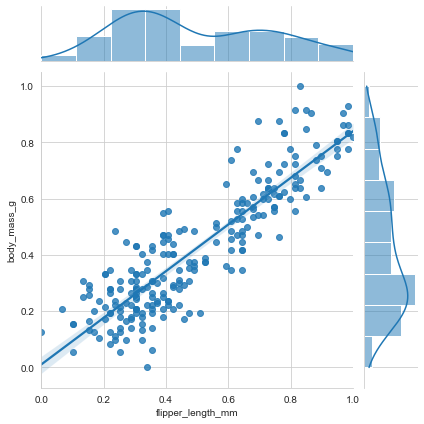

In [17]:
'''
Здесь и далее - рисуем красивые картинки - диаграммки рассеяния с возможной линией - функцией простой линейной регрессии
А сверху и справа - гистограмма распределения с огибающей линией
'''

fig = plt.figure(figsize=(20, 20))
axes = sns.jointplot(
    x=X_train['flipper_length_mm'], y=y_train,
    kind='reg',
    ci=95)
plt.show()

<Figure size 1440x1440 with 0 Axes>

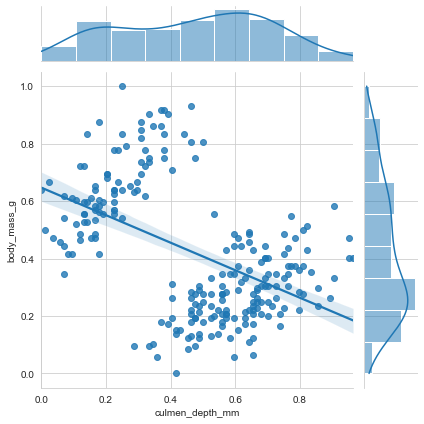

In [18]:
fig = plt.figure(figsize=(20, 20))
axes = sns.jointplot(
    x=X_train['culmen_depth_mm'], y=y_train,
    kind='reg',
    ci=95)
plt.show()

<Figure size 1440x1440 with 0 Axes>

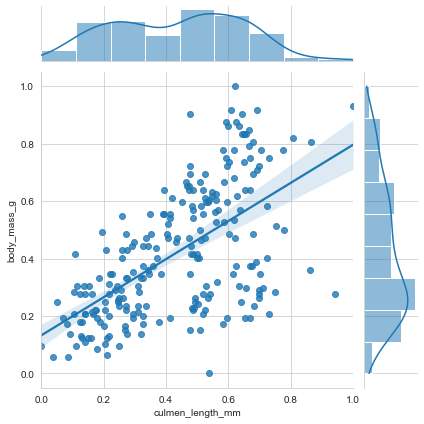

In [19]:
fig = plt.figure(figsize=(20, 20))
axes = sns.jointplot(
    x=X_train['culmen_length_mm'], y=y_train,
    kind='reg',
    ci=95)
plt.show()

In [20]:
'''
Тут лежат алгоритмы линейной регрессии
'''
from sklearn.linear_model import LinearRegression

'''
Создаем и обучаем линейную регрессию
'''
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [21]:
'''
Смотрим весовые коэффициенты линейной регрессии, которые мы в результате получили
'''
coeff_df = pd.DataFrame(regressor.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
culmen_length_mm,0.007401
culmen_depth_mm,0.040708
flipper_length_mm,0.848580


In [22]:
'''
Делаем предсказания на тестовом датафрейме
'''
y_pred = regressor.predict(X_test)

In [23]:
'''
Выводим рядышком - реальное значение целевой переменной (Actual) и предсказанное (Predicted)
'''

p_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
p_df

,Actual,Predicted
214,0.472222,0.590244
300,0.166667,0.336626
320,0.270833,0.352139
130,0.173611,0.262506
216,0.555556,0.663638
...,...,...
78,0.236111,0.210015
117,0.298611,0.404227
189,0.708333,0.678285
181,0.791667,0.684482


In [24]:
'''
вот тут лежат все метрики
'''
from sklearn import metrics


'''
Смотрим метрики - ошибку между реальным и предсказанным значением
'''

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


'''
По самим метрикам ничего сказать нельзя- надо смотреть на средние и медианные значения целевой переменной. И прикинуть, на сколько процентов ошибается наша модель.
В нашем случае - около 30%
'''

Mean Absolute Error: 0.09703349217857225
Mean Squared Error: 0.014198362934891373
Root Mean Squared Error: 0.11915688370753648


In [25]:
'''
Пробуем обучить линейную гребневую регрессию

Делаем тоже, что и раньше
'''

from sklearn.linear_model import LinearRegression, Ridge

regressor1 = Ridge(alpha=0.5)
regressor1.fit(X_train, y_train)

Ridge(alpha=0.5)

In [26]:
coeff_df = pd.DataFrame(regressor.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
culmen_length_mm,0.007401
culmen_depth_mm,0.040708
flipper_length_mm,0.848580


In [27]:
y_pred1 = regressor1.predict(X_test)

In [28]:
p_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
p_df

,Actual,Predicted
214,0.472222,0.590415
300,0.166667,0.345495
320,0.270833,0.366968
130,0.173611,0.263700
216,0.555556,0.656155
...,...,...
78,0.236111,0.219107
117,0.298611,0.380133
189,0.708333,0.654648
181,0.791667,0.678085


In [29]:
'''
Смотрим метрики - ошибку между реальным и предсказанным значением
'''

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))


'''
Ничего особо не изменилось.

проблем точности нашей модели - не в весовых коэффициентах, а в данных.
(Вспоминаем, что датасет распадался минимум на 2 кластера. Надо было создавать модель для каждого кластера)
'''

Mean Absolute Error: 0.09826189686891633
Mean Squared Error: 0.01416304492878891
Root Mean Squared Error: 0.11900859182760255


In [42]:
'''
Еще один способ обучить линейную регрессию - лежит в statsmodels
Тут же лежат много статистических функций и критериев.
'''

import statsmodels.api as sm
import matplotlib.pyplot as plt

'''
Пересобираем данные для обучения
'''
X = X_train[['flipper_length_mm']]
y = y_train

'''
Создаем и обучаем модель
'''
model = sm.OLS(y, X)
results = model.fit()


Text(0.5, 1.0, 'Linear Regression')

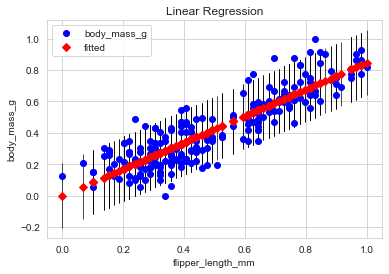

In [43]:
'''
Красиво отрисовываем, и смотрим, что для трейн данных простая линейная регрессия для flipper_length_mm и body_mass_g
вполне хорошо смотрится
'''

fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 0, ax=ax)
ax.set_ylabel("body_mass_g")
ax.set_xlabel("flipper_length_mm")
ax.set_title("Linear Regression")

In [58]:
'''
Смотрим, что он там напредсказывает по этой модели
Вычисляем предсказания
'''

y_pred = results.predict(X_test[['flipper_length_mm']])


In [59]:
'''
R2 метрика, коэффициент  детерминации, показывающий насколько расчетные параметры модели объясняют зависимость и изменения целевой переменной Y от нецелевых фич - X.

Можно сказать что, это показатель качества модели и чем он выше тем лучше.
Понятное дело, что он не может быть больше 1 и считается неплохо, когда R2 выше 0,8, а если меньше 0,5, то смысл такой модели можно смело ставить под большой вопрос.


У нас тут все хорошо
'''

print('R2 =', results.rsquared)

R2 = 0.9525225120884449


In [60]:
'''
Волшебная функция, которая вычисляет много метрик.
И выдает в том числе заключение, можно ли считать построенную модель адекватной с определенным уровнем достоверности
'''

import scipy as sci

# Доверительная вероятность и уровень значимости:
p_level = 0.95
a_level = 1 - p_level

def regression_model_adequacy_check(
        model_fit,
        p_level: float=0.95,
        model_name=''):

    n = int(model_fit.nobs)
    p = int(model_fit.df_model)    # Число степеней свободы регрессии, равно числу переменных модели (за исключением константы, если она присутствует)

    SST = model_fit.centered_tss    # SST (Sum of Squared Total)
    dfT = n-1
    MST = SST / dfT

    SSE = model_fit.ssr    # SSE (Sum of Squared Error)
    dfE = n - p - 1
    MSE = SSE / dfE

    F_calc = MST / MSE
    F_table = sci.stats.f.ppf(p_level, dfT, dfE, loc=0, scale=1)
    a_calc = 1 - sci.stats.f.cdf(F_calc, dfT, dfE, loc=0, scale=1)
    conclusion_model_adequacy_check = 'adequacy' if F_calc >= F_table else 'non adequacy'

    # формируем результат
    result = pd.DataFrame({
        'SST': (SST),
        'SSE': (SSE),
        'dfT': (dfT),
        'dfE': (dfE),
        'MST': (MST),
        'MSE': (MSE),
        'p_level': (p_level),
        'a_level': (a_level),
        'F_calc': (F_calc),
        'F_table': (F_table),
        'F_calc >= F_table': (F_calc >= F_table),
        'a_calc': (a_calc),
        'a_calc <= a_level': (a_calc <= a_level),
        'adequacy_check': (conclusion_model_adequacy_check),
    },
        index=[model_name]
    )

    return result

In [45]:
regression_model_adequacy_check(results, p_level=0.95, model_name='linear_ols')

,SST,SSE,dfT,dfE,MST,MSE,p_level,a_level,F_calc,F_table,F_calc >= F_table,a_calc,a_calc <= a_level,adequacy_check
linear_ols,11.798749,2.524362,232,231,0.050857,0.010928,0.95,0.05,4.653807,1.241956,True,1.110223e-16,True,adequacy


In [54]:
'''
Теперь обернем все обучение простой регрессии в функцию
'''

def  simple_linear_regression(X_train, y_train, X_test, y_test, column_name):
   '''

   :param X_train:
   :param y_train:
   :param X_test:
   :param y_test:
   :param column_name:
   :return:
   '''

   '''
   Переформируем датасеты для OLS из statsmodels
   '''
   X = X_train[[column_name]]
   y = y_train

   '''
   Обучаем модель
   '''
   model = sm.OLS(y, X)
   results = model.fit()

   results.summary()
   '''
   Подготавливаем рисунок
   '''
   fig, ax = plt.subplots()
   fig = sm.graphics.plot_fit(results, 0, ax=ax)
   ax.set_ylabel("body_mass_g")
   ax.set_xlabel(column_name)
   ax.set_title("Linear Regression")

   '''
   Считаем R2
   '''
   print('R2 =', results.rsquared)

   '''
   Выводим метрики
   '''
   res = regression_model_adequacy_check(results, p_level=0.95, model_name='linear_ols')
   print(res)




R2 = 0.9525225120884449
                  SST       SSE  dfT  dfE       MST       MSE  p_level  \
linear_ols  11.798749  2.524362  232  231  0.050857  0.010928     0.95   

            a_level    F_calc   F_table  F_calc >= F_table        a_calc  \
linear_ols     0.05  4.653807  1.241956               True  1.110223e-16   

            a_calc <= a_level adequacy_check  
linear_ols               True       adequacy  


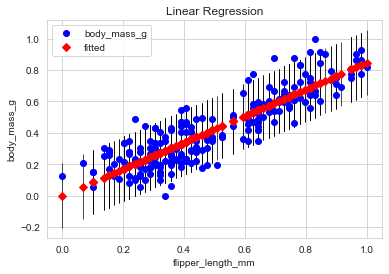

In [55]:
'''
Запускаем для разных столбцов
'''
simple_linear_regression(X_train, y_train, X_test, y_test, 'flipper_length_mm' )

R2 = 0.8446156121749542
                  SST       SSE  dfT  dfE       MST       MSE  p_level  \
linear_ols  11.798749  8.261735  232  231  0.050857  0.035765     0.95   

            a_level    F_calc   F_table  F_calc >= F_table    a_calc  \
linear_ols     0.05  1.421964  1.241956               True  0.003815   

            a_calc <= a_level adequacy_check  
linear_ols               True       adequacy  


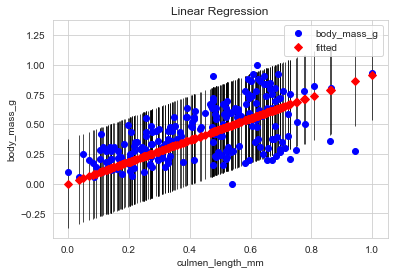

In [56]:
simple_linear_regression(X_train, y_train, X_test, y_test, 'culmen_length_mm' )

R2 = 0.47345394264306806
                  SST        SSE  dfT  dfE       MST       MSE  p_level  \
linear_ols  11.798749  27.996273  232  231  0.050857  0.121196     0.95   

            a_level    F_calc   F_table  F_calc >= F_table  a_calc  \
linear_ols     0.05  0.419623  1.241956              False     1.0   

            a_calc <= a_level adequacy_check  
linear_ols              False   non adequacy  


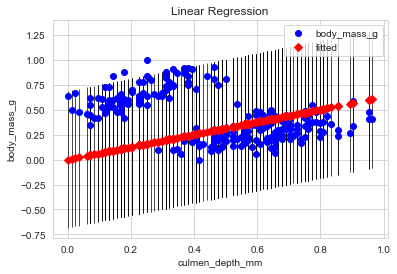

In [57]:
simple_linear_regression(X_train, y_train, X_test, y_test, 'culmen_depth_mm' )

In [61]:
'''
Из представленных выше данных, видно, что простая линейная регрессия вполне нормально строится для
culmen_length_mm (R2 = 0.84) и flipper_length_mm  (R2 = 0.95)

Для culmen_length_mm  простая линейная регрессия недостаточно хорошая (R2 = 0.47)

Вообще, по графикам видно, что датасет распадается как минимум на 2 кластера. Соответственно, линейную регрессию стоило бы строить для каждого кластера отдельно



'''

'\nИз представленных выше данных, видно, что простая линейная регрессия вполне нормально строится для\nculmen_length_mm (R2 = 0.84) и flipper_length_mm  (R2 = 0.95)\n\nДля culmen_length_mm  простая линейная регрессия недостаточно хорошая (R2 = 0.47)\n\nВообще, по графикам видно, что датасет распадается как минимум на 2 кластера. Соответственно, линейную регрессию стоило бы строить для каждого кластера отдельно\n\n\n\n'